In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os
import sys

src_dir = './../../src/'
sys.path[0] = src_dir

import matplotlib.pyplot as plt

import glob

import numpy as np
import pandas as pd
import seaborn as sns

from collections import OrderedDict

from access_biology_data import meta, relations, properties
from access_literature_data import medline
from access_science_shared import standardizer 

In [4]:
sys.path.append('./../src/')
from aging_tools import inout, export
from access_aging_data import earlier_studies, chaperome, companions, sequencing

In [5]:
from scipy.stats import spearmanr
import numpy as np
import statsmodels.api as sm

In [6]:
save_images = False

In [7]:
pr = properties.genbank_validated_rna(10090)[['gene_ncbi', 'Genbank_validated_RNA: full_SumACGT']].rename(columns={
    'Genbank_validated_RNA: full_SumACGT': 'length'
})

pr.loc[:, 'log_length'] = np.log10(pr['length'])

In [8]:
ref_genes = standardizer.reference_genes(10090, 'orp')

In [9]:
pr = pd.merge(pr, meta.gene_info(10090, ['gene_ncbi', 'symbol_ncbi']))

In [10]:
pr.head()

,gene_ncbi,length,log_length,symbol_ncbi
0,11287,4681.0,3.670339,Pzp
1,11298,1370.0,3.136721,Aanat
2,11302,5423.0,3.734240,Aatk
3,11303,10260.0,4.011147,Abca1
4,11304,7268.0,3.861415,Abca4


In [11]:
tissues = ['A', 'B', 'C', 'D', 'E']

In [12]:
from scipy.stats import mannwhitneyu

In [13]:
tissues = {
    'tissue_independent': 'A',
    'heart': 'B',
    'liver': 'C',
    'cerebellum': 'D',
    'olfactory_bulb': 'E', 
    
}

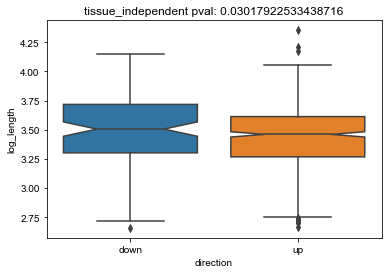

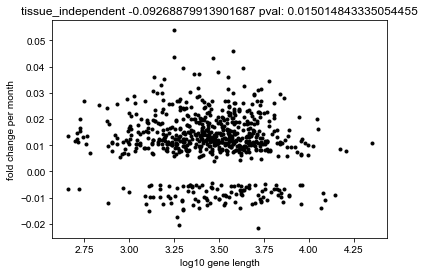

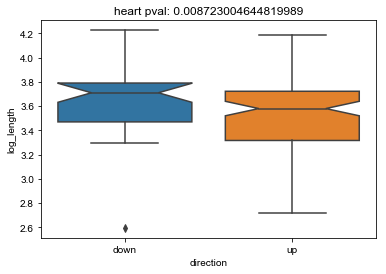

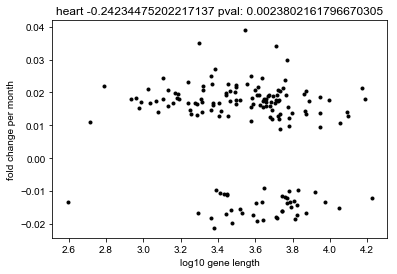

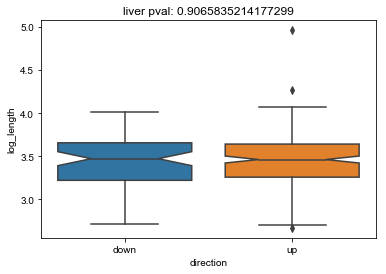

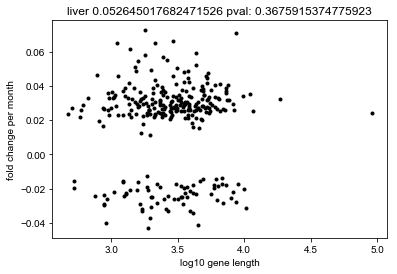

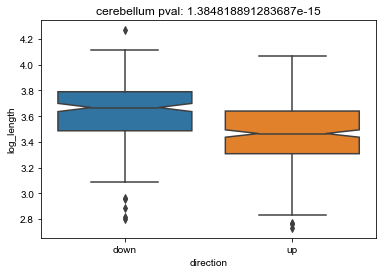

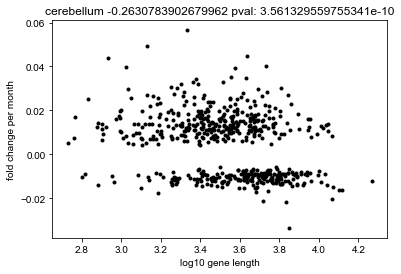

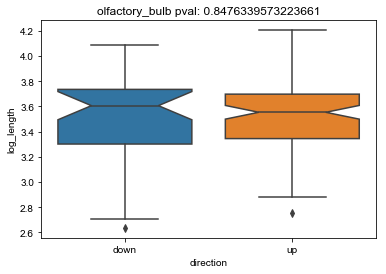

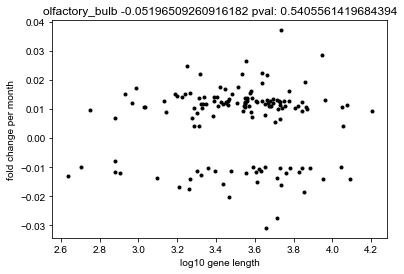

In [14]:
for tissue in tissues.keys():

    p = '/Users/tstoeger/Dropbox/aging_map_paper/datasets/general/resources/publications/benayoun_2019/Supplemental_Table_S4.xlsx'

    df = pd.read_excel(p, tissues[tissue],header=1).rename(columns={'Gene Name': 'symbol_ncbi'})

    prc = pr.copy()


    f = prc['symbol_ncbi'].isin(
        df[df['Age change']=='UP']['symbol_ncbi'])
    prc.loc[f, 'direction'] = 'up'

    f = prc['symbol_ncbi'].isin(
        df[df['Age change']=='DOWN']['symbol_ncbi'])
    prc.loc[f, 'direction'] = 'down'
    
    pv = mannwhitneyu(
        prc[prc['direction']=='down']['log_length'],
        prc[prc['direction']=='up']['log_length'],
        alternative='two-sided'
    )[1]

#     prc.loc[:, 'direction'] = prc.loc[:, 'direction'].fillna(0)

    plt.figure()
    sns.boxplot(x='direction', y='log_length', data=prc, notch=True, order=['down', 'up'])
    plt.title('{} pval: {}'.format(tissue, pv))
    
    
    plt.figure()
    
    j = pd.merge(df, pr)
    plt.plot(j['log_length'], j['log2(FoldChange per month of life)'], '.k')
    rho, pval = spearmanr(j['log_length'], j['log2(FoldChange per month of life)'])
    plt.title('{} {} pval: {}'.format(tissue, rho, pval))
    plt.xlabel('log10 gene length')
    plt.ylabel('fold change per month')